**XXIX SEMANA DE COMPUTAÇÃO IBILCE/UNESP**
# Introdução ao Processamento de Linguagem Natural com Python
PROF. DR. HENRIQUE DEZANI



### 1. Obtendo o córpus
Os sistemas de Processamento de Linguagem Natural são criados usando uma enorme quantidade de dados. Em termos leigos, você pode dizer que uma grande coleção de dados é chamada **córpus**. Portanto, mais formal e tecnicamente, o córpus pode ser definido da seguinte forma: uma coleção de material de linguagem natural escrita ou falada, armazenada no computador e usada para descobrir como a linguagem é usada. Mais precisamente, um corpus é uma coleção sistemática computadorizada de linguagem autêntica usada para análise linguística e também para análise de corpus. Se você possui mais de um córpus, isso se chama corpora.

#### 1.1. IMDB Dataset
O [dataset imdb](https://www.kaggle.com/luisfredgs/imdb-ptbr) é um dos mais famosos benchmarks para modelos de classificação de textos que existe e consiste em um conjunto de dados com resenhas de filmes junto com seus rótulos de polaridade de sentimento binário associados. Destina-se a servir de referência para a classificação de sentimentos. A distribuição geral dos rótulos é equilibrada (25 mil posisitvas e 25 mil negativas).


In [2]:
import pandas as pd

In [3]:
data_frame = pd.read_csv('imdb-comentarios.csv')

# url = 'https://raw.githubusercontent.com/henriquedezani/curso-semac2019/master/imdb-comentarios.csv'
# data_frame = pd.read_csv(url)

In [4]:
data_frame.head()

,comentario,classificacao
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,Este é um exemplo do motivo pelo qual a maiori...,0
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,Nem mesmo os Beatles puderam escrever músicas ...,0
4,Filmes de fotos de latão não é uma palavra apr...,0


In [7]:
data_frame.tail()

,comentario,classificacao
49454,"Como a média de votos era muito baixa, e o fat...",1
49455,O enredo teve algumas reviravoltas infelizes e...,1
49456,Estou espantado com a forma como este filme e ...,1
49457,A Christmas Together realmente veio antes do m...,1
49458,O drama romântico da classe trabalhadora do di...,1


In [8]:
data_frame['classificacao'].value_counts()

0    24765
1    24694
Name: classificacao, dtype: int64

In [9]:
data_frame['comentario'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [10]:
# !pip install sklearn

['Eu', 'ao', 'apenas', 'as', 'com', 'como', 'da', 'de', 'do', 'dos', 'ela', 'ele', 'eles', 'em', 'era', 'esse', 'este', 'está', 'eu', 'filme', 'filmes', 'foi', 'história', 'isso', 'mais', 'mas', 'me', 'muito', 'na', 'no', 'não', 'os', 'ou', 'para', 'por', 'quando', 'que', 'realmente', 'se', 'ser', 'seu', 'sobre', 'sua', 'são', 'também', 'tem', 'tão', 'um', 'uma', 'você']


(49459, 50)


In [21]:
# https://github.com/amueller/word_cloud
# !pip install wordcloud

     |████████████████████████████████| 163kB 152kB/s eta 0:00:01


In [86]:
%matplotlib inline 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(column, classificacao = '1'):
    todas_palavras = ' '.join([text for text in data_frame.query('classificacao == {}'.format(classificacao))[column]])
    nuvem_palavra = WordCloud(width=800, height=600, max_font_size=110, collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(10,8))
    plt.imshow(nuvem_palavra, interpolation='bilinear') # nitidez (bilinear)
    plt.axis('off') # sem eixos
    plt.show()    

In [6]:
%matplotlib inline 
# gera o gráfico no próprio jupyter notebook

from wordcloud import WordCloud

# todas_palavras = ' '.join([text for text in data_frame.query('classificacao == 0')['comentario']])
todas_palavras = ' '.join([text for text in data_frame['comentario']])

# print(todas_palavras)

In [12]:
import numpy as np
from os import path
from PIL import Image

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

NameError: name 'os' is not defined

In [9]:

nuvem_palavra = WordCloud(width=800, height=600, max_font_size=110, collocations=False, mask='alice_mask.png').generate(todas_palavras)
# collocation = False (pega palavra por palavra), = True, pega mais de uma palavra

AttributeError: 'str' object has no attribute 'dtype'

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(nuvem_palavra, interpolation='bilinear') # nitidez (bilinear)
plt.axis('off') # sem eixos
plt.show()

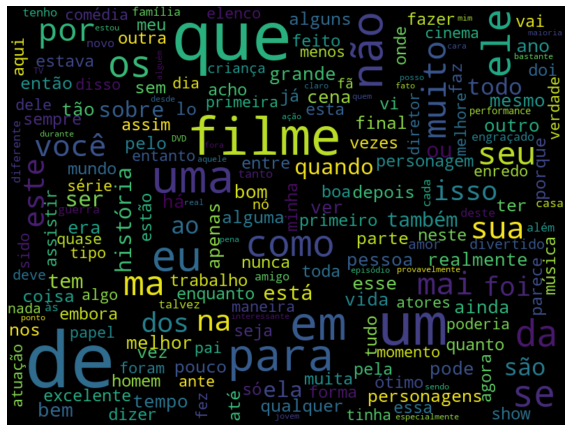

In [87]:
plot_wordcloud('comentario')

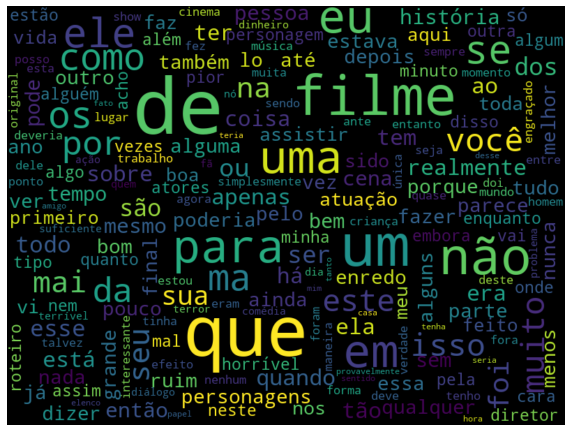

In [88]:
plot_wordcloud('comentario', '0')

In [45]:
import nltk
nltk.download('all')

/Users/dezani/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/dezani/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/dezani/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/dezani/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/dezani/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/dezani/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nlt

[nltk_data]    |   Unzipping corpora/sentiwordnet.zip.
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /Users/dezani/nltk_data...
[nltk_data]    |   Unzipping corpora/sentence_polarity.zip.
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /Users/dezani/nltk_data...
[nltk_data]    |   Unzipping corpora/shakespeare.zip.
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /Users/dezani/nltk_data...
[nltk_data]    |   Unzipping corpora/sinica_treebank.zip.
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /Users/dezani/nltk_data...
[nltk_data]    |   Unzipping corpora/smultron.zip.
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /Users/dezani/nltk_data...
[nltk_data]    |   Unzipping corpora/state_union.zip.
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /Users/dezani/nltk_data...
[nltk_data]    |   Unzipping corpora/stopwords.zip.
[nltk_data]

True

In [47]:
from nltk import tokenize

frase = 'Olá Mundo'
tokens = tokenize.WhitespaceTokenizer().tokenize(frase)

In [48]:
tokens

['Olá', 'Mundo']

In [118]:
todas_palavras = ' '.join([text for text in data_frame['p1']])
frequencia = nltk.FreqDist(tokenize.WhitespaceTokenizer().tokenize(todas_palavras))

df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequência" : list(frequencia.values())})

In [119]:
df_frequencia.head(20)

,Palavra,Frequência
0,vez,15428
1,sr,1888
2,costner,71
3,arrumou,3
4,filme,153721
5,tempo,16207
6,necessario,736
7,alem,7800
8,terriveis,1039
9,sequencias,1631


In [120]:
df_frequencia = df_frequencia.nlargest(columns='Frequência', n = 50)

In [121]:
df_frequencia.head(20)

,Palavra,Frequência
4,filme,153721
61,ser,34175
75,filmes,32544
57,sobre,29093
215,tao,25244
154,realmente,24862
439,historia,23911
368,apenas,23904
53,bem,23226
135,todos,21670


### 2. Pré-processamento: Manipulando texto bruto do corpus

In [109]:
!pip install unidecode

     |████████████████████████████████| 245kB 75kB/s eta 0:00:011


In [113]:
import nltk
import unidecode
stop_words = nltk.corpus.stopwords.words('portuguese')
print(stop_words)

for index, stop_word in enumerate(stop_words):
    stop_words[index] = unidecode.unidecode(stop_word)

print(stop_words)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [94]:
from string import punctuation
pontuacoes = list(punctuation)
print(pontuacoes)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [116]:
processamento1 = list()

for comentario in data_frame['p0']:
    # palavras = tokenize.WhitespaceTokenizer().tokenize(comentario)
    palavras = tokenize.WordPunctTokenizer().tokenize(comentario)
    nova_frase = [palavra for palavra in palavras if palavra not in stop_words and palavra not in pontuacoes]
    processamento1.append(' '.join(nova_frase))
    
data_frame['p1'] = processamento1

In [117]:
data_frame.head()

,comentario,classificacao,p1,p0
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,vez sr costner arrumou filme tempo necessario ...,"mais uma vez, o sr. costner arrumou um filme p..."
1,Este é um exemplo do motivo pelo qual a maiori...,0,exemplo motivo maioria filmes acao mesmos gene...,este e um exemplo do motivo pelo qual a maiori...
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0,primeiro tudo odeio raps imbecis poderiam agir...,"primeiro de tudo eu odeio esses raps imbecis, ..."
3,Nem mesmo os Beatles puderam escrever músicas ...,0,beatles puderam escrever musicas todos gostass...,nem mesmo os beatles puderam escrever musicas ...
4,Filmes de fotos de latão não é uma palavra apr...,0,filmes fotos latao palavra apropriada verdade ...,filmes de fotos de latao nao e uma palavra apr...


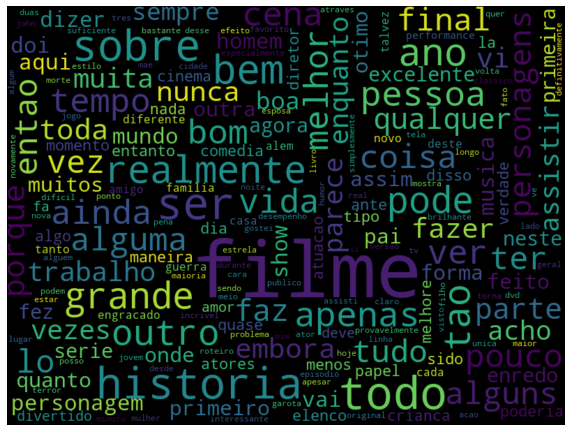

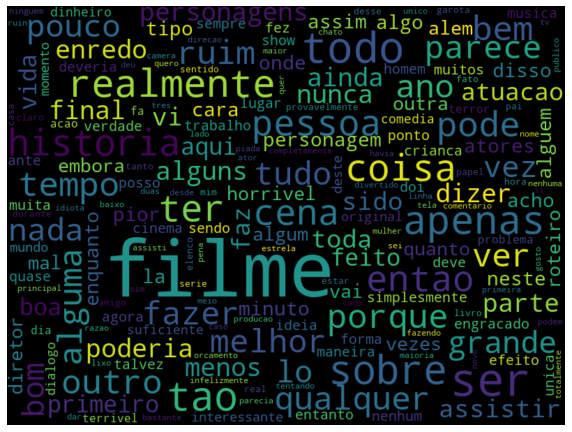

In [122]:
plot_wordcloud('p1')
plot_wordcloud('p1', '0')

In [55]:
## Lowercase, Stemming, Tokenizer, Stop Word, Unicoded (ASCII)

In [133]:
from nltk.stem import RSLPStemmer
stemmer = RSLPStemmer()
stemmer.stem('filminho')

'film'

In [114]:
p0 = [unidecode.unidecode(comentario.lower()) for comentario in data_frame['comentario']]
data_frame['p0'] = p0

In [115]:
data_frame.head()

,comentario,classificacao,p1,p0
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,vez sr costner arrumou filme tempo necessário ...,"mais uma vez, o sr. costner arrumou um filme p..."
1,Este é um exemplo do motivo pelo qual a maiori...,0,exemplo motivo maioria filmes ação mesmos gené...,este e um exemplo do motivo pelo qual a maiori...
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0,primeiro tudo odeio raps imbecis poderiam agir...,"primeiro de tudo eu odeio esses raps imbecis, ..."
3,Nem mesmo os Beatles puderam escrever músicas ...,0,beatles puderam escrever músicas todos gostass...,nem mesmo os beatles puderam escrever musicas ...
4,Filmes de fotos de latão não é uma palavra apr...,0,filmes fotos latão palavra apropriada verdade ...,filmes de fotos de latao nao e uma palavra apr...


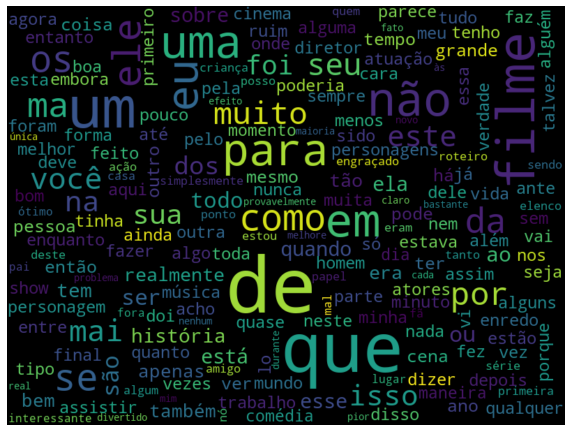

In [80]:
plot_wordcloud('p0')

In [93]:
# Remover pontuação
from string import punctuation

print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


### 3. Feature Engineering
A engenharia de características é o processo de gerar ou derivar características, ou seja, atributos ou propriedades mensuráveis individuais de um fenômeno, a partir de dados ou córpus brutos que nos ajudarão a desenvolver aplicativos de PLN ou a solucionar problemas relacionados a PLN.

Uma característica pode ser definida como uma informação ou propriedade mensurável que é útil ao criar aplicativos de PLN ou prever a saída de aplicativos de PLN.

In [56]:
## BOW

In [162]:
# BOW
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorizer.fit_transform(data_frame["p1"])

print(vectorizer.get_feature_names())

print(bag_of_words.shape)

# Uma matriz é dita esparsa quando possui uma grande quantidade de elementos que valem zero[1] (ou não presentes,
#  ou não necessários).[2]
# Matrizes esparsas têm aplicações em problemas em computação: armazenamento de dados (e.g., planilhas eletrônicas)
# A matriz esparsa é implementada através de um conjunto de listas ligadas que apontam para elementos diferentes 
#  de zero. De forma que os elementos que possuem valor zero não são armazenados.

frame = pd.SparseDataFrame(bag_of_words, columns=vectorizer.get_feature_names(), default_fill_value=0)
frame

['ainda', 'algumas', 'alguns', 'anos', 'apenas', 'assistir', 'bem', 'bom', 'cenas', 'coisa', 'dizer', 'enredo', 'entao', 'faz', 'fazer', 'filme', 'filmes', 'final', 'grande', 'historia', 'lo', 'melhor', 'menos', 'nada', 'nunca', 'parece', 'parte', 'personagem', 'personagens', 'pessoas', 'pode', 'poderia', 'porque', 'pouco', 'qualquer', 'realmente', 'ruim', 'ser', 'sobre', 'tao', 'tempo', 'ter', 'the', 'todo', 'todos', 'tudo', 'ver', 'vez', 'vi', 'vida']
(49459, 50)


,ainda,algumas,alguns,anos,apenas,assistir,bem,bom,cenas,coisa,...,tempo,ter,the,todo,todos,tudo,ver,vez,vi,vida
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0,3,2,0,0,1,...,0,0,0,0,1,0,4,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,2,0,1,0,0
3,1,0,0,1,1,0,1,0,0,0,...,1,1,0,1,2,0,1,0,1,0
4,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7,0,0,0,1,0,0,0,0,0,2,...,0,1,0,0,1,0,0,0,0,0
8,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4. Machine Learning
Usaremos técnicas de Machine Learning para processar a linguagem natural e desenvolver modelos que nos darão o resultado final. Esse modelo é chamado de modelo de aprendizado de máquina (modelo ML). Vamos alimentar recursos para algoritmos de aprendizado de máquina como entrada e gerar o modelo de aprendizado de máquina. Depois disso, usaremos o modelo de aprendizado de máquina gerado para produzir uma saída apropriada para um aplicativo de PLN.

In [158]:
### Train_teste_split
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                data_frame["classificacao"],
                                                                random_state = 42)

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

regressao_logistica = LogisticRegression(solver = "lbfgs")
regressao_logistica.fit(treino, classe_treino)

previsao_teste = regressao_logistica.predict(teste)

acuracia_teste = accuracy_score(classe_teste, previsao_teste)
precisao_teste = precision_score(classe_teste, previsao_teste)
f1_teste = f1_score(classe_teste, previsao_teste)
recall_teste = recall_score(classe_teste, previsao_teste)
print(precisao_teste, acuracia_teste, recall_teste, f1_teste)

0.6655967318354246 0.6879094217549535 0.7443302333170174 0.7027651544327197


In [154]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression(solver = "lbfgs")
regressao_logistica.fit(treino, classe_treino)


previsao_teste = regressao_logistica.predict_proba(teste)
print(previsao_teste)

previsao_teste_bol = previsao_teste[:,1] >= 0.5
print(previsao_teste_bol)

import numpy as np
previsao_teste_int = previsao_teste_bol.astype(np.int)
print(previsao_teste_int)

from sklearn.metrics import accuracy_score
acuracia_teste = accuracy_score(classe_teste, previsao_teste_int)
print(acuracia_teste)

[[0.07650835 0.92349165]
 [0.35343417 0.64656583]
 [0.85623548 0.14376452]
 ...
 [0.46742958 0.53257042]
 [0.46612149 0.53387851]
 [0.36709031 0.63290969]]
[ True  True False ...  True  True  True]
[1 1 0 ... 1 1 1]
0.7803477557622321
